In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
x=np.linspace(0,50,501)

In [ ]:
y=np.sin(x)

In [ ]:
df=pd.DataFrame(data=y,index=x,columns=['Sine Value'])

In [ ]:
df

,Sine Value
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
len(df)

501

In [ ]:
test_percent=0.1

In [ ]:
test_point=np.round(len(df)*test_percent)

In [ ]:
test_point

50.0

In [ ]:
test_index=int(len(df)-test_point)

In [ ]:
test_index

451

In [ ]:
train=df.iloc[:test_index]

In [ ]:
test=df.iloc[test_index:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler=MinMaxScaler()

In [ ]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

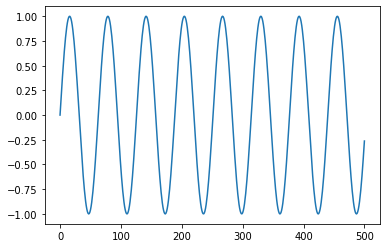

In [ ]:
plt.plot(y)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
train_generator=TimeseriesGenerator(data=scaled_train,targets=scaled_train,length=49,batch_size=1)

In [ ]:
test_genertor=TimeseriesGenerator(data=scaled_test,targets=scaled_test,length=49,batch_size=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,LSTM,Dense

In [ ]:
model=Sequential()


In [ ]:
model.add(LSTM(49,input_shape=(49,1)))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit_generator(train_generator,epochs=10,validation_data=test_genertor,callbacks=[early_stop])

Epoch 1/10
402/402 [==============================] - 33s 83ms/step - loss: 0.0108 - val_loss: 4.1147e-05
Epoch 2/10
402/402 [==============================] - 34s 85ms/step - loss: 2.3900e-04 - val_loss: 4.9001e-05
Epoch 3/10
402/402 [==============================] - 33s 83ms/step - loss: 2.2816e-04 - val_loss: 2.5688e-05
Epoch 4/10
402/402 [==============================] - 34s 86ms/step - loss: 9.1864e-05 - val_loss: 2.0895e-05
Epoch 5/10
402/402 [==============================] - 33s 83ms/step - loss: 1.4112e-04 - val_loss: 7.3565e-05
Epoch 6/10
402/402 [==============================] - 34s 86ms/step - loss: 1.3193e-04 - val_loss: 2.7231e-06
Epoch 7/10
402/402 [==============================] - 34s 85ms/step - loss: 9.1650e-05 - val_loss: 2.9310e-07
Epoch 8/10
402/402 [==============================] - 36s 89ms/step - loss: 1.9772e-04 - val_loss: 5.4714e-06
Epoch 9/10
402/402 [==============================] - 36s 91ms/step - loss: 2.3988e-04 - val_loss: 1.1632e-05


In [ ]:
losses=pd.DataFrame(model.history.history)

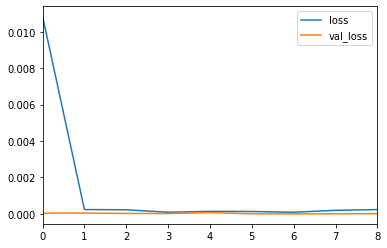

In [ ]:
losses.plot()

In [ ]:
test_predictions=[]

first_batch=scaled_train[-49:]
current_batch=first_batch.reshape((1,49,1))

for i in range(len(scaled_test)):
    prediction=model.predict(current_batch)[0]
    
    test_predictions.append(prediction)

    current_batch=np.append(current_batch[:,1:,:],[[prediction]],axis=1)

















In [ ]:
true_predictions=scaler.inverse_transform(test_predictions)

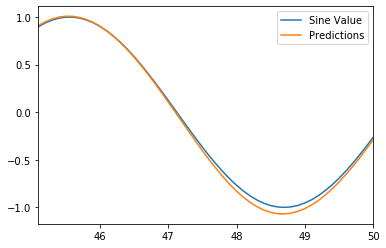

In [ ]:
test.plot()

In [ ]:
###PREDICTING BRAND NEW DATA###

In [ ]:
scaler_ful=MinMaxScaler()

In [ ]:
scaler_ful.fit(df)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_ful_data=scaler_ful.transform(df)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 

In [ ]:
full_generator=TimeseriesGenerator(data=scaled_ful_data,targets=scaled_ful_data,length=50,batch_size=1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop=EarlyStopping(monitor='loss',patience=2)

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
full_model=Sequential()

In [ ]:
full_model.add(LSTM(50,input_shape=(50,1)))
full_model.add(Dense(1))

full_model.compile(optimizer='adam',loss='mse')

In [ ]:
full_model.fit_generator(full_generator,epochs=10,callbacks=[early_stop])

Epoch 1/10
451/451 [==============================] - 40s 89ms/step - loss: 0.0150
Epoch 2/10
451/451 [==============================] - 38s 85ms/step - loss: 0.0016
Epoch 3/10
451/451 [==============================] - 43s 96ms/step - loss: 3.7558e-05
Epoch 4/10
451/451 [==============================] - 42s 92ms/step - loss: 4.9353e-05
Epoch 5/10
451/451 [==============================] - 39s 87ms/step - loss: 3.4558e-05
Epoch 6/10
451/451 [==============================] - 40s 88ms/step - loss: 5.2261e-05
Epoch 7/10
451/451 [==============================] - 44s 98ms/step - loss: 5.4051e-05


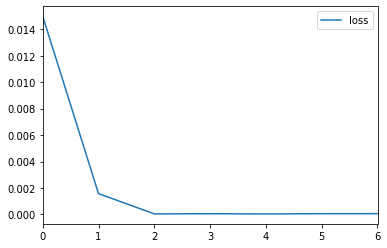

In [ ]:
pd.DataFrame(full_model.history.history).plot()

In [ ]:
full_forecast=[]

first_batch=scaled_ful_data[-50:]
batch_rescaled=first_batch.reshape((1,50,1))

for i in range(25):
    
    prediction_fut=full_model.predict(batch_rescaled)[0]
    full_forecast.append(prediction_fut)
    batch_rescaled=np.append(batch_rescaled[:,1:,:],[[prediction_fut]],axis=1)

In [ ]:
full_forecast=scaler_ful.inverse_transform(full_forecast)

In [ ]:
df1=pd.DataFrame(full_forecast,index=np.arange(50.1,52.6,0.1))

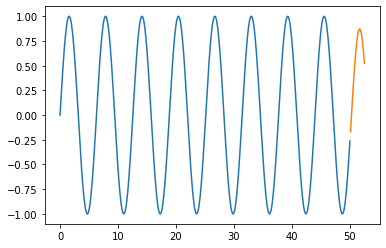

In [ ]:
plt.plot(df)
plt.plot(df1)

In [ ]:
len(full_forecast)

25

In [ ]:
50.1+ 25*0.1

52.6

In [ ]:
df


,Sine Value
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [ ]:
df1

,0
50.1,-0.170042
50.2,-0.072892
50.3,0.024648
50.4,0.121542
50.5,0.216745
50.6,0.309194
50.7,0.397830
50.8,0.481603
50.9,0.559495
51.0,0.630533
